# pyBumpHunter Example

Simple notebook for testing the pyBumpHunter.py package.

We will use histograms ranging between 0 and 20 with 60 even bins.

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pyBumpHunter as BH
from datetime import datetime  ## Used to compute the execution time
import uproot as upr  ## Used to read data from a root file

In [39]:
#import xgboost as xgb
#import matplotlib.pyplot as plt
#import uproot as uproot
import pandas as pd
#import numpy as np
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import roc_curve, auc
import shutil
from array import array
import math
from tqdm import tqdm
import os

#print(xgb.__version__)

import ROOT
print(ROOT.gROOT.GetVersion())
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetLegendBorderSize(0)
ROOT.gStyle.SetLegendTextSize(0.035)
ROOT.gStyle.SetLegendFont(62)
ROOT.gStyle.SetLabelFont(62)

import analysisfunction

6.32.06


In [40]:
plot_folder = "test_bumphunter"

if not os.path.exists('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder):
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder)
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/datamc')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/plots_2d')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/python_plots')
    os.makedirs('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/data')
    

In [41]:
#set base ROOT color numbers (from TAttFill class ref) for use with matplotlib
kWhite  = 0   
kBlack  = 1
kGray    = 920
kRed    = 632
kGreen  = 416
kBlue   = 600
kYellow = 400
kMagenta = 616
kCyan   = 432
kOrange = 800
kSpring = 820
kTeal   = 840
kAzure   =  860
kViolet = 880
kPink   = 900

#set default color and hatching
colors = [ROOT.gROOT.GetColor(kRed+2).AsHexString(), ROOT.gROOT.GetColor(kOrange+3).AsHexString(),
          ROOT.gROOT.GetColor(kGray).AsHexString(), ROOT.gROOT.GetColor(kOrange+1).AsHexString(),
          ROOT.gROOT.GetColor(38).AsHexString(), ROOT.gROOT.GetColor(30).AsHexString(),
          ROOT.gROOT.GetColor(kOrange+1).AsHexString(), ROOT.gROOT.GetColor(kAzure+6).AsHexString(),
          ROOT.gROOT.GetColor(kGreen+1).AsHexString(), ROOT.gROOT.GetColor(kPink+5).AsHexString(),
          ROOT.gROOT.GetColor(kPink-6).AsHexString(), ROOT.gROOT.GetColor(kPink-8).AsHexString(),
          ROOT.gROOT.GetColor(kPink-7).AsHexString(), ROOT.gROOT.GetColor(kPink).AsHexString()]

hatches = ['\\\\','\\\\','\\\\','\\\\',None,None,None,None,None,None,None,None,None,]

#default = do not plot y axis as log, and do not include eff and pur in title
plotlog = False
showeffpur = False

#default legend position (upper right corner)
legx1 = 0.45
legy1 = 0.55
legx2 = 0.85
legy2 = 0.85

#POT information
run1dataPOT = 0.0
run2dataPOT = 0.0
run3dataPOT = 0.0

run1dataPOT = 1.42549e+20
run2dataPOT = 2.54086e+20
run3dataPOT = 2.37673e+20

run1frac = 1.42549
run2frac = 2.54086
run3frac = 2.37673

run1ExtBnbPOT = 2.02672e+20 #6.67349e+19
run2ExtBnbPOT = 3.60832e+20
run3ExtBnbPOT = 5.19263e+20

#run1dataSpills =  6.9301e+06
#run3dataSpills = 0.0
#run1BnbPOT = 7.87981e+20   #4.14781e+20#1.16272e20
#run3BnbPOT = 6.28739e+20
#run1ExtBnbSpills = 1.488e+07
#run3ExtBnbSpills = 8.81379e+06
#run1DirtPOT = 3.56173e+20   #1.51589e+20
#run3DirtPOT = 3.59228e+20

Numu_Cut = 0.4 #0000000000000036 #0.10000000000000009  
Other_Cut = 0.2 #0000000000000018 #-0.3999999999999999  
NC_Pi0_Cut = -0.05 #999999999999982 #-0.3999999999999999  
Nue_Cut = -1.0 #-3.0

#Numu_Cut = 0.1 #-3.0 #0.40000000000000036 #0.10000000000000009  
#Other_Cut = -0.4 #0.20000000000000018 #-0.3999999999999999  
#NC_Pi0_Cut = -0.4 #-0.04999999999999982 #-0.3999999999999999  
#Nue_Cut = -3.0 #-1.0 #-3.0  

#files
nu_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run1_sp.root"       
nu_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run2_sp.root"      
nu_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnboverlay_run3_sp_1.root"     
DIRT_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run1_sp.root"              
DIRT_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run2_sp.root"              
DIRT_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_dirt_run3_sp.root"              
EXTBNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run1_sp.root"        
EXTBNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_D2_run2_sp.root"         
EXTBNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_extbnb_run3_sp.root"         
BNB_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run1_full.root"         
BNB_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run2_full.root"               
BNB_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_bnb_run3_full.root"               
sp_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run1_cv.root"
sp_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run2_cv.root"
sp_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_inclusivephoton_run3_cv.root"
ncpi0_overlay_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run1_sp.root"
ncpi0_overlay_2="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run2_sp.root"
ncpi0_overlay_3="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_ncpi0_run3_sp.root"
lee_1="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/checkout_LEE_1g0p_run1_half.root"

nu_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_overlay_may8_reco2_hist_62280499_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_overlay_reco2_hist_flagbugfix.root"
DIRT_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_dirt_may8_reco2_hist_62280564_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_dirt_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_dirt_reco2_hist.root"
EXTBNB_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_off_may8_reco2_hist_goodruns_62280841_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_beam_off_reco2_hist_goodruns_62221096_snapshot_goodruns.root"#MCC9.10_Test_Samples_v10_04_07_03_Run4b_super_unified_reco2_BNB_beam_off_reco2_hist.root"
BNB_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_beam_on_may8_reco2_hist_goodruns_62280934_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_beam_on_reco2_hist_goodruns_62221062_snapshot_goodruns.root"#MCC9.10_Test_Samples_v10_04_07_03_Run4b_super_unified_reco2_BNB_beam_on_reco2_hist.root"
nue_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nue_overlay_may8_reco2_hist_62280525_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nue_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nue_overlay_reco2_hist.root"
ncpi0_overlay_4b="/Users/eyandel/Documents/MicroBooNE/spbdt/data/processed_checkout_rootfiles/mcc910/validation/SURPRISE_Test_Samples_v10_04_07_05_Run4b_hyper_unified_reco2_BNB_nu_NC_pi0_overlay_may8_reco2_hist_62280465_snapshot.root"#SURPRISE_Test_Samples_v10_04_07_05_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root"#MCC9.10_Test_Samples_v10_04_07_04_Run4b_super_unified_reco2_BNB_nu_NC_pi0_overlay_reco2_hist.root"


#BNB_1 = ncpi0_overlay_1
#BNB_2 = ncpi0_overlay_2
#BNB_3 = ncpi0_overlay_3

In [42]:
##FOR USING AN OVERLAY AS DATA
run1dataPOT = analysisfunction.GetPOT(ncpi0_overlay_1)
run2dataPOT = analysisfunction.GetPOT(ncpi0_overlay_2)
run3dataPOT = analysisfunction.GetPOT(ncpi0_overlay_3)

1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [43]:
pot_vars = [
        ("run1BnbPOT", nu_overlay_1),
        ("run2BnbPOT", nu_overlay_2),
        ("run3BnbPOT", nu_overlay_3),
        ("run1DirtPOT", DIRT_1),
        ("run2DirtPOT", DIRT_2),
        ("run3DirtPOT", DIRT_3),
        ("run1SPPOT", sp_overlay_1),
        ("run2SPPOT", sp_overlay_2),
        ("run3SPPOT", sp_overlay_3),
        ("run1NCPi0POT", ncpi0_overlay_1),
        ("run2NCPi0POT", ncpi0_overlay_2),
        ("run3NCPi0POT", ncpi0_overlay_3)
    ]

for var_name, file_name in pot_vars:
    globals()[var_name] = analysisfunction.GetPOT(file_name)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


# Load input files


In [44]:


#all_df_in_bdt_sp_overlay, all_df_in_pfeval_sp_overlay, all_df_in_kine_sp_overlay, all_df_in_eval_sp_overlay = analysisfunction.LoadTreesData(sp_overlay_1, sp_overlay_2, sp_overlay_3)


In [45]:
all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over = analysisfunction.LoadTreesTruth(nu_overlay_1, nu_overlay_2, nu_overlay_3)

all_df_in_bdt_over = analysisfunction.LoadBNBOverlay(all_df_in_bdt_over, all_df_in_pfeval_over, all_df_in_kine_over, all_df_in_eval_over)
del all_df_in_pfeval_over
del all_df_in_eval_over
del all_df_in_kine_over

In [46]:
all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt = analysisfunction.LoadTreesTruth(DIRT_1, DIRT_2, DIRT_3)

all_df_in_bdt_dirt = analysisfunction.LoadDirt(all_df_in_bdt_dirt, all_df_in_pfeval_dirt, all_df_in_kine_dirt, all_df_in_eval_dirt)
del all_df_in_pfeval_dirt
del all_df_in_eval_dirt
del all_df_in_kine_dirt

In [47]:
all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb = analysisfunction.LoadTreesData(EXTBNB_1, EXTBNB_2, EXTBNB_3)

all_df_in_bdt_ext = analysisfunction.LoadExtBnb(all_df_in_bdt_extbnb, all_df_in_pfeval_extbnb, all_df_in_kine_extbnb, all_df_in_eval_extbnb)
del all_df_in_pfeval_extbnb
del all_df_in_eval_extbnb
del all_df_in_kine_extbnb

In [48]:
#all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(BNB_1, BNB_2, BNB_3)
all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb = analysisfunction.LoadTreesData(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)


all_df_in_bdt_data = analysisfunction.LoadBnb(all_df_in_bdt_bnb, all_df_in_pfeval_bnb, all_df_in_kine_bnb, all_df_in_eval_bnb)
del all_df_in_pfeval_bnb
del all_df_in_eval_bnb
del all_df_in_kine_bnb

In [49]:
all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0 = analysisfunction.LoadTreesTruth(ncpi0_overlay_1, ncpi0_overlay_2, ncpi0_overlay_3)

all_df_in_bdt_ncpi0 = analysisfunction.LoadNCPi0Overlay(all_df_in_bdt_ncpi0, all_df_in_pfeval_ncpi0, all_df_in_kine_ncpi0, all_df_in_eval_ncpi0)
del all_df_in_pfeval_ncpi0
del all_df_in_eval_ncpi0
del all_df_in_kine_ncpi0

In [50]:
all_df = pd.concat([all_df_in_bdt_over, all_df_in_bdt_dirt, all_df_in_bdt_ext, all_df_in_bdt_data], ignore_index=True, sort=False)

In [51]:
del all_df_in_bdt_over
del all_df_in_bdt_dirt
del all_df_in_bdt_ext
del all_df_in_bdt_data

In [52]:
num_evts = all_df.shape[0]

y = all_df["true_event_type"].to_numpy()

w = []
w = analysisfunction.CalculateWeights(all_df, run1dataPOT, run2dataPOT, run3dataPOT, run1ExtBnbPOT, run2ExtBnbPOT, run3ExtBnbPOT, pot_vars)

7.303211076491763e+20
9.049534941552791e+20
6.281006245845998e+20
3.561395382175706e+20
7.533552993217751e+20
3.591920851932946e+20
8.151040776494641e+21
7.387567278135982e+21
9.98563866382949e+21
1.2771014098929228e+21
6.710204772333e+21
1.2311733857349017e+21


In [53]:
weights_sig, weights_bkg, weights_data = analysisfunction.GetVariableArrays(all_df, "weights", "weights", [])
    
        
num_sig_tot=np.sum(weights_sig) #/ 0.83

# Make data, bkg, sig

In [115]:
#make input arrays for bump hunter
hist_input = False

sig_no, bkg, data = analysisfunction.GetVariableArrays(all_df, "kine_pio_mass","pi0_mass", [], "ncpi0_sideband")

sig_scale = 1.5
sig_raw, bkg_sig, data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "kine_pio_mass","pi0_mass", [-3], "ncpi0_sideband")
#w_sig_in, w_bkg_sig, w_data_sig = analysisfunction.GetVariableArrays(all_df_in_bdt_ncpi0, "weights", "w", [-3], "ncpi0_sideband")

sig = [x * sig_scale for x in sig_raw]

w_sig, w_bkg, w_data = analysisfunction.GetVariableArrays(all_df, "weights", "w", [], "ncpi0_sideband")

sig = np.array(sig)
bkg = np.array(bkg)
data = np.array(data)

In [116]:
print(sig)

[149.8176   141.2795   319.62698  ...  13.274189 275.53607  148.0041  ]


## For hist inputs

hist_input = True

#Open the file
File = upr.open('/Users/eyandel/Documents/MicroBooNE/bump/data/Xp_1500_data_hists.root')
File.items()

#Background
bkg = File['bkg'].values()

#Data
data = File['data'].values()

#Signal
sig = File['sig'].values()

In [117]:
# Position of the bump in the data
#Lth = 5.5

# Range for the histogram
rang = [0,1000]
binnum = 50

bkg.shape

(15470,)

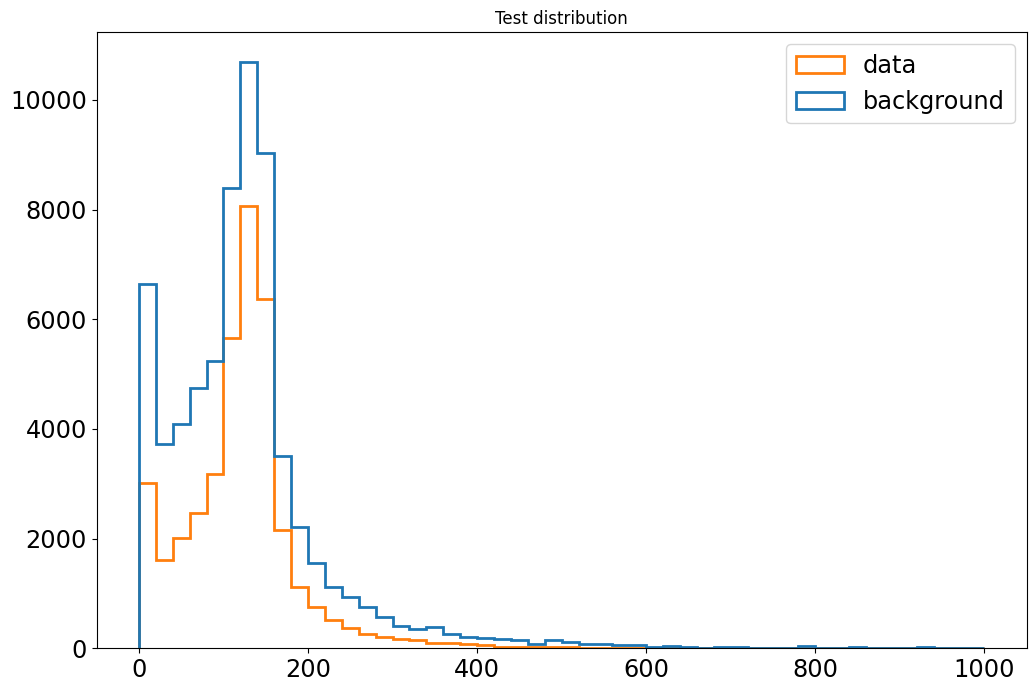

In [118]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, data, yerr=np.sqrt(data), fmt='o', label='data', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    plt.hist(
        [bkg, data],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "data"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()

## Create a BumpHunter1D class instance.

The BumpHunte1Dr class provides all the methods required to "bump hunt" in ease.

All the parameters and results are also stored in this object.

In [141]:
hunter = BH.BumpHunter1D(
    rang=rang,
    width_min=1,
    width_max=10,
    width_step=1,
    scan_step=1,
    npe=4000000,
    nworker=1,
    seed=666,
    bins=binnum,
    weights=w_bkg,
)

## Call the BumpScan Method

The function will scan the data distribution using variable-width window sizes (between width_min and width_max) and calculate the p-value of data with respect to the background for each window. The minimum p-value obtained from all windows is the local p-value.

To cope with the look-elsewhere effect a global p-value is calculated using a two-step procedure:
- the distribution of possible p-values is determined from background-only pseudo-experiments (npe parameter)
- the p-value found in data is compared to the background-only p-value distribution to calculate the global p-value

In [120]:
print('####bump_scan call####')
begin = datetime.now()
hunter.bump_scan(data, bkg, is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####bump_scan call####
Generating histograms
7 values of width will be tested
SCAN
Global p-value : 1.0000  (100000 / 100000)
Significance = 0

time=0:01:02.001115



## Print results of BH scan

Print information on more significant window ("bump"): location, width, excess over background events, global p-value and global significance.

In [121]:
print(hunter.bump_info(data))
#print(f'   mean (true) = {Lth}')

Bump edges : [0, 20]  (loc=0, width=1)
Bump mean | width : 10 | 20
Evaluated number of signal events : -3.64e+03
Local p-value | test statistic : 1 | -0
Local significance : -inf
Global p-value : 1
Global significance : 0


## Tomography plot

This figure shows the p-value in each of the windows used to scan the data distribution.

In [122]:
#hunter.plot_tomography(data)

## Show most significant window

Window with the lowest p-value obtained from the data scans.

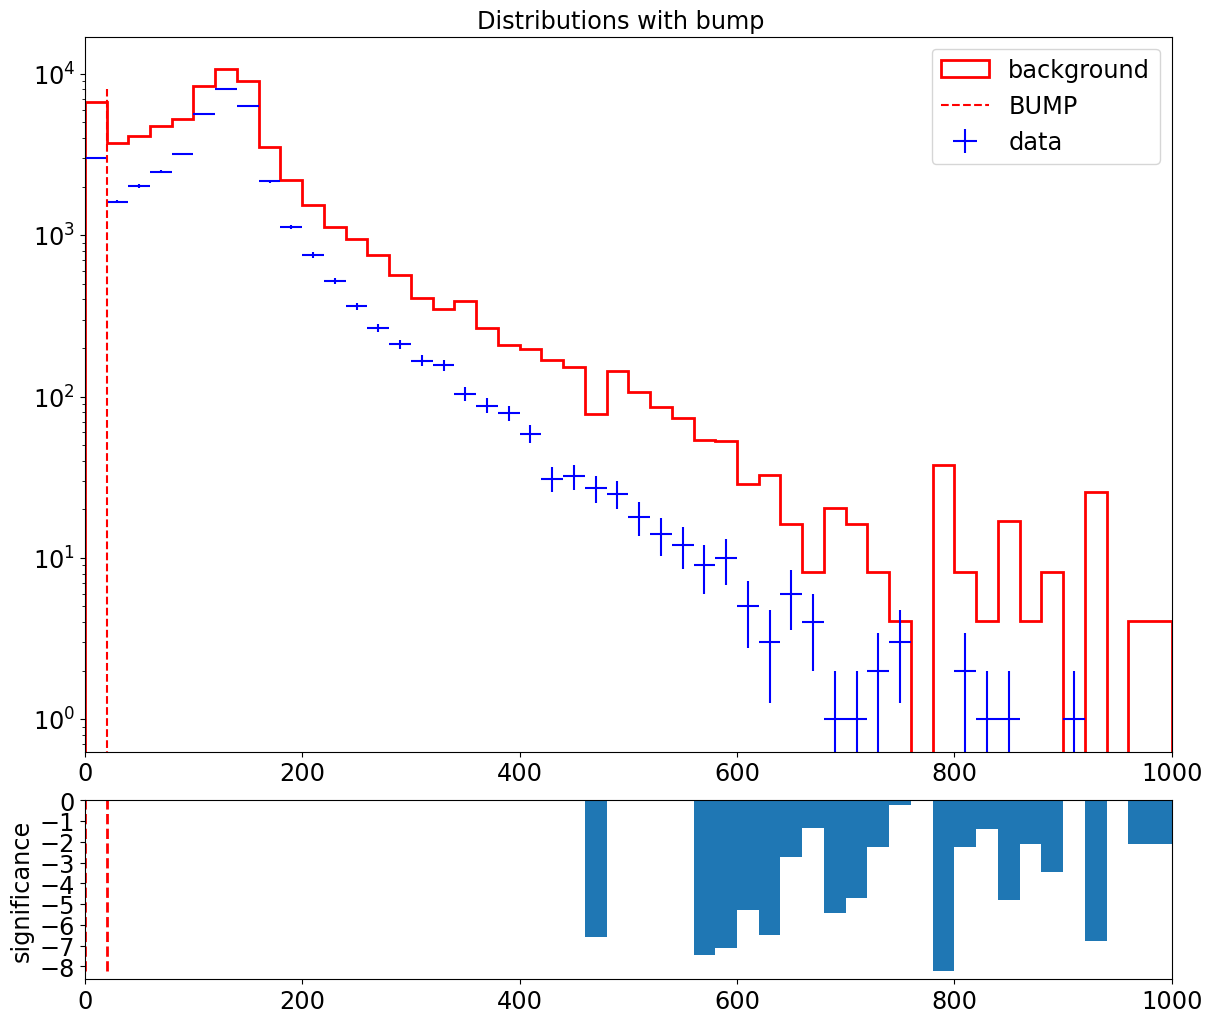

In [123]:
hunter.plot_bump(data, bkg, is_hist=hist_input)

# Global p-value

This figure shows the test statistics (log(p-value)) obtained from background-only toys and the p-value obtained from data. The global p-value is equal to the fraction of background-only experiments whch have a higher test statistics than for the data (i.e this is the p-value of p-values).

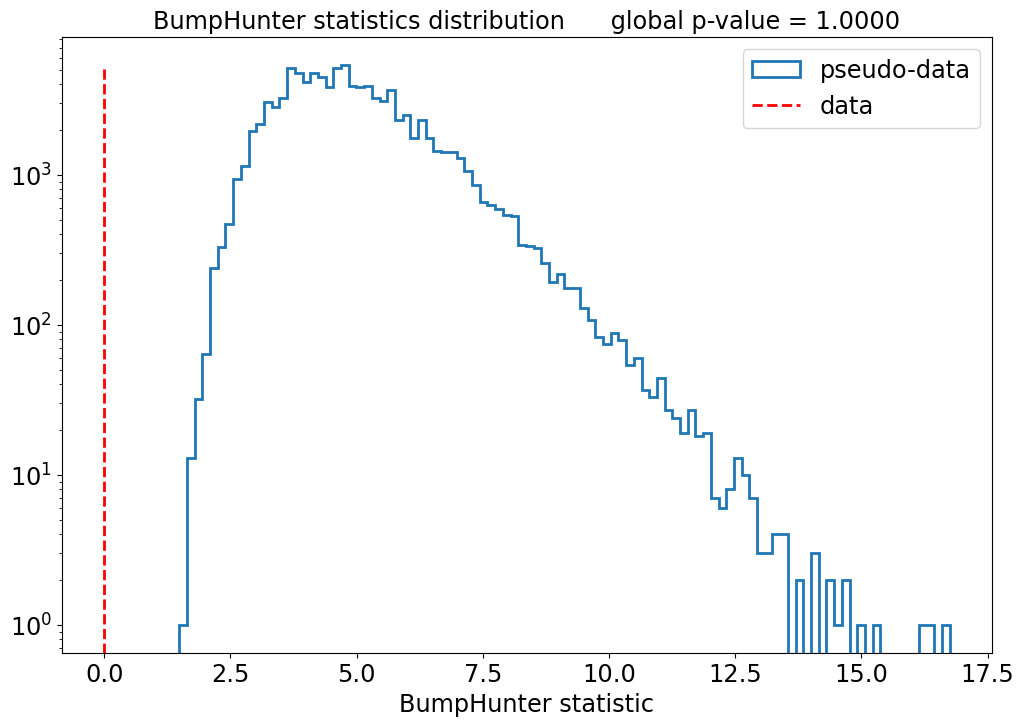

In [124]:
hunter.plot_stat(show_Pval=True)

## Signal injection

Inject signal in data until a 5 sigma excess is found. 

In [125]:
len(sig)

38642

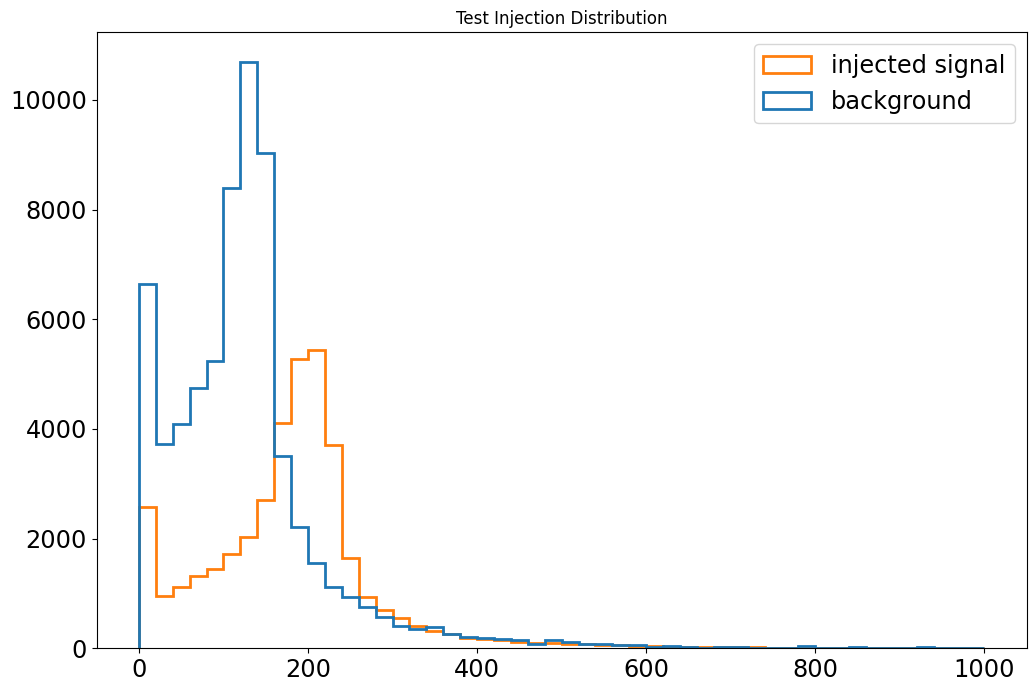

In [126]:
# Plot the 2 distributions (data and background)
if hist_input:
    F = plt.figure(figsize=(12,8))
    plt.title("Test distribution")
    # Since bkg and data are already arrays of bin contents, use bar plot to show them
    bin_edges = np.linspace(rang[0], rang[1], len(bkg)+1)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    plt.bar(bin_centers, bkg, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='background', color='C0', edgecolor='C0')
    plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)
else:
    # if input arrays instead of input hists
    F = plt.figure(figsize=(12,8))
    plt.title("Test Injection Distribution")
    plt.hist(
        [bkg, sig],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background", "injected signal"],
        linewidth=2,
        weights=[w_bkg, w_data],
    )
    plt.legend(fontsize='xx-large')
    plt.xticks(fontsize='xx-large')
    plt.yticks(fontsize='xx-large')
    plt.show()
    F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/distribution_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

In [142]:
# We have to set additionnal parameters specific to the signal injection.
# All the parameters defined previously are kept.
hunter.sigma_limit = 5
hunter.str_min = 0.01 # if str_scale='log', the real starting value is 10**str_min
hunter.str_step = 0.01
hunter.str_scale = 'lin' #'log'
hunter.signal_exp = len(sig) #150 # Correspond the the real number of signal events generated when making the data
hunter.npe_inject = 2000

print('####signal_inject call####')
begin = datetime.now()
hunter.signal_inject(sig,bkg,is_hist=hist_input)
end = datetime.now()
print(f'time={end - begin}')
print('')

####signal_inject call####
Generating background only histograms
10 values of width will be tested
BACKGROUND ONLY SCAN
STARTING INJECTION
   STEP 1 : signal strength = 0.01
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0839  (335413 / 4000000)   0.3876  (1550396)   0.0089  (35552)
Significance = 1.37961 (0.28558  2.37025)

   STEP 2 : signal strength = 0.02
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0001  (492 / 4000000)   0.0060  (23851)   0.0000  (4)
Significance = 3.66639 (2.51434  4.75342)

   STEP 3 : signal strength = 0.03
Generating background+signal histograms
BACKGROUND+SIGNAL SCAN
Global p-value : 0.0000  (0 / 4000000)   0.0000  (1)   0.0000  (0)
Significance = 5.02631 (5.02631  5.02631)

REACHED SIGMA LIMIT
   Number of signal event injected : 1159.26
   Signal strength : 0.0300

time=0:56:23.868926



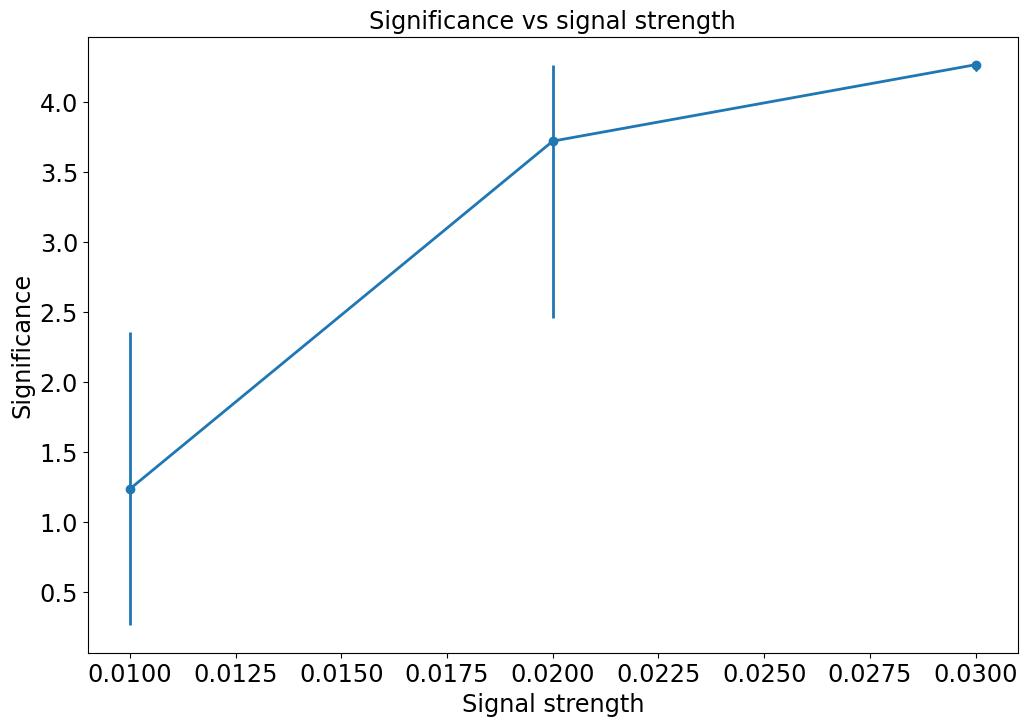

In [128]:
# Get the injection plot (with linear and log scale axis)
hunter.plot_inject()
hunter.plot_inject(filename = '/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_sig_'+str(sig_scale)+'.png')

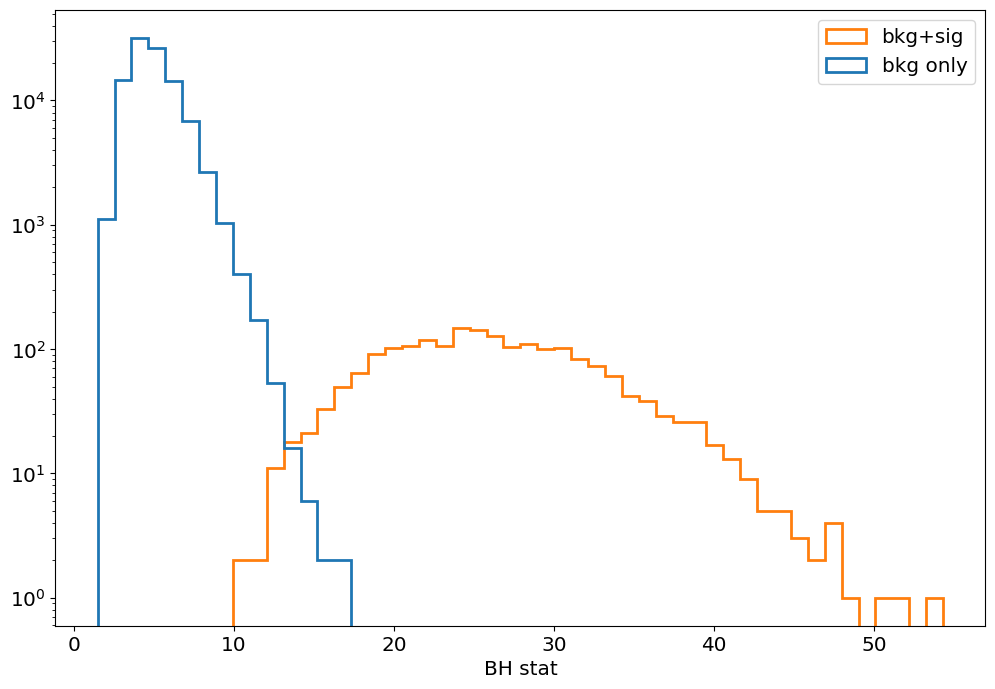

In [129]:
F = plt.figure(figsize=(12,8))
plt.hist(
    [hunter.t_ar[:hunter.npe],hunter.t_ar[hunter.npe:]],
    bins=50,
    histtype='step',
    lw=2,
    label=['bkg only', 'bkg+sig']
)
plt.legend(fontsize='x-large')
plt.xlabel('BH stat', size='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.yscale('log')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/BHstat_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)

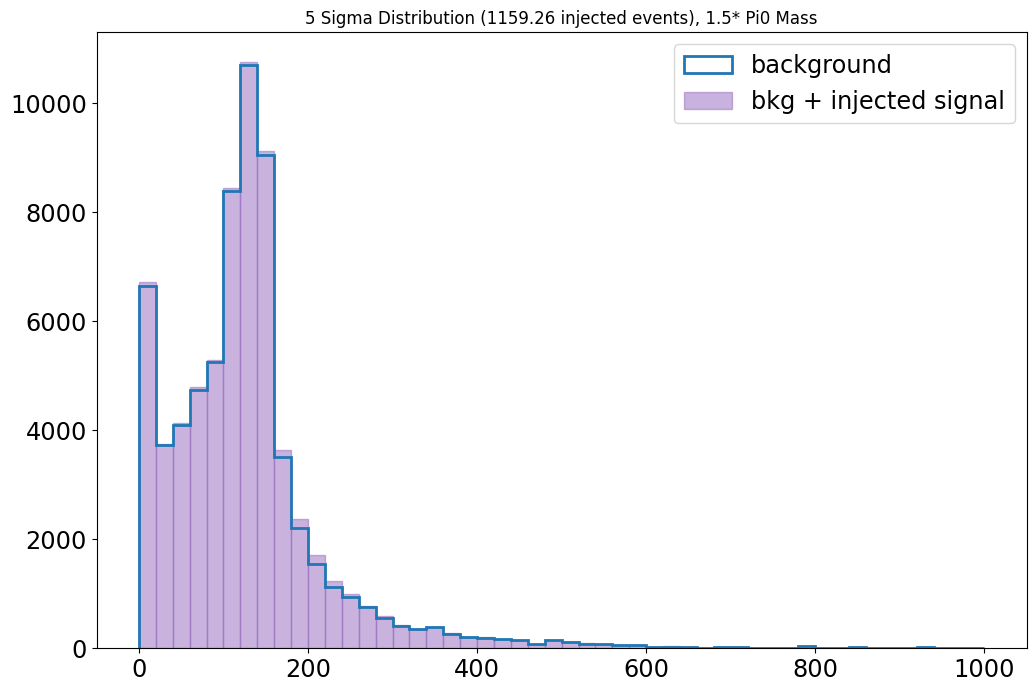

In [130]:
# Plot the signal injected distribution
F = plt.figure(figsize=(12,8))
plt.title("5 Sigma Distribution (" + str(hunter.signal_min) + " injected events), " + str(sig_scale) + "* Pi0 Mass")
# Since bkg and data are already arrays of bin contents, use bar plot to show them
bin_edges = np.linspace(rang[0], rang[1], len(hunter.data_inject)+1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

plt.bar(bin_centers, hunter.data_inject, width=bin_edges[1]-bin_edges[0], align='center', alpha=0.5, label='bkg + injected signal', color='C4', edgecolor='C4')
#plt.errorbar(bin_centers, sig, yerr=np.sqrt(sig), fmt='o', label='injected signal', color='C1')
plt.hist(
        [bkg],
        bins=binnum,
        histtype="step",
        range=rang,
        label=["background"],
        linewidth=2,
        weights=[w_bkg],
    )
plt.legend(fontsize='xx-large')
plt.xticks(fontsize='xx-large')
plt.yticks(fontsize='xx-large')
plt.show()
F.savefig('/Users/eyandel/Documents/MicroBooNE/bump/plots/'+plot_folder+'/mc_only/signal_inject_'+str(sig_scale)+'.png', format='png',facecolor='white', transparent=False)